<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/Collect_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time
import itertools 

In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
consumer_key="5iwJ0kh5IkWudh2kXbbV0s5eM"
consumer_secret="DSZGordR8WpGbNJbxwEwMBvJ4E4RJRbemzLQ0vpVArAzSuoLqY"
access_token="799815406462652416-V4f33Mp2G81GeSLeWVHQgGtp2djIuyK"
access_token_secret="UH4iGaQhmNiKVeo2scTmgZneTQuRDR10SSoyivGS0qU0K"


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
#, wait_on_rate_limit=True, timeout = 5

#try1

In [ ]:
# define screen_name
def get_ids(screen_name):
    '''
    :argument: screen_name of user
    :returns: a list_id of the given user's followers
    '''
    # get first list
    first_list = api.search(q = screen_name, rpp = 100, lang = "en")
    id_list = first_list['text']
    cursor = first_list['next_cursor']
    while cursor != 0 :
        user_ids = api.search(q = screen_name, rpp = 100, lang = "en", cursor=cursor)
        id_list.extend(user_ids[0]['ids'])
        cursor = user_ids[0]['next_cursor']
    return id_list

In [ ]:
all_tweets_airline = get_ids("Airlines")

TypeError: ignored

#I run this for all files 

In [ ]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets4(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  new_tweets = api.search(q = screen_name, rpp = 100, lang = "en")
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left
  while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q = screen_name,rpp = 100,max_id=oldest, lang = "en")
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, screen_name] 
               for tweet in alltweets]
  # write the csv
  with open(path + '/%s_tweets.csv' % screen_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
    writer.writerows(outtweets)
  pass

In [ ]:
get_all_tweets4('#AirCanada')

getting tweets before 1337035614730915839
...30 tweets downloaded so far
getting tweets before 1336763263082696705
...45 tweets downloaded so far
getting tweets before 1336700087830011908
...60 tweets downloaded so far
getting tweets before 1336515175319564288
...71 tweets downloaded so far
getting tweets before 1336452110418927618
...86 tweets downloaded so far
getting tweets before 1336430076884365316
...98 tweets downloaded so far
getting tweets before 1336403765386207232
...112 tweets downloaded so far
getting tweets before 1336337692213198850
...126 tweets downloaded so far
getting tweets before 1336074483551981567
...139 tweets downloaded so far
getting tweets before 1335987378062671881
...152 tweets downloaded so far
getting tweets before 1335946554016935936
...167 tweets downloaded so far
getting tweets before 1335777383127937024
...182 tweets downloaded so far
getting tweets before 1335684440064847872
...197 tweets downloaded so far
getting tweets before 1335127416310788096
..

#try again new code to avoid duplicate tweets

In [ ]:
import tweepy

consumer_key="5iwJ0kh5IkWudh2kXbbV0s5eM"
consumer_secret="DSZGordR8WpGbNJbxwEwMBvJ4E4RJRbemzLQ0vpVArAzSuoLqY"


# Replace the API_KEY and API_SECRET with your application's key and secret.
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
!pip3 install jsonpickle

In [ ]:
import sys
import jsonpickle
import os

searchQuery = '#saudi_airlines'  # this is what we're searching for
maxTweets = 1000 # Some arbitrary large number
tweetsPerQry = 100  # this is the max the API permits
fName = 'hasg_saudia_tweets.csv' # We'll store the tweets in a text file.


# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None


places = []
time = []
tweets = []

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id = -1

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))

with open(path + fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry, lang = 'en')
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            since_id=sinceId, lang = 'en')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1), lang = 'en')
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId, lang = 'en')
            if not new_tweets:
                
                print("No more tweets found")
                break
            for tweet in new_tweets:
                
                #add data to lists
                
                #1. creted at
                time.append((tweet.created_at.month,tweet.created_at.year))
                
                #location of user
                places.append(tweet.user.location)
                
                #text of tweet
                tweets.append(tweet.text)
                
                f.write(jsonpickle.encode(tweet.text, unpicklable=False) +'\n')
                
            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

Downloaded 3 tweets
No more tweets found
Downloaded 3 tweets, Saved to hasg_saudia_tweets.csv


#Collect the datasets

In [ ]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  new_tweets = api.user_timeline(screen_name = screen_name,count=200, lang = "en")
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left
  while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest, lang = "en")
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, screen_name] 
               for tweet in alltweets]
  # write the csv
  with open(path + '/%s_tweets.csv' % screen_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
    writer.writerows(outtweets)
  pass

In [ ]:
get_all_tweets("Saudia_airlines")

TweepError: ignored

In [ ]:
get_all_tweets("flynas")

getting tweets before 1334850066801156096
...400 tweets downloaded so far
getting tweets before 1333156561330597889
...600 tweets downloaded so far
getting tweets before 1331215307248193536
...800 tweets downloaded so far
getting tweets before 1329369271940607999
...1000 tweets downloaded so far
getting tweets before 1327251135770599429
...1200 tweets downloaded so far
getting tweets before 1325649121156403199
...1400 tweets downloaded so far
getting tweets before 1323859462243966977
...1600 tweets downloaded so far
getting tweets before 1322264179290578945
...1800 tweets downloaded so far
getting tweets before 1320685303896723456
...2000 tweets downloaded so far
getting tweets before 1319247641604128768
...2200 tweets downloaded so far
getting tweets before 1317695904825167871
...2400 tweets downloaded so far
getting tweets before 1316309111512936448
...2600 tweets downloaded so far
getting tweets before 1314965630454566918
...2800 tweets downloaded so far
getting tweets before 131359

#try another hashtag for flynas

In [ ]:
search_query="saudia_airlines"
new_tweets = tweepy.Cursor(api.user_timeline,q=search_query,count=200,lang="en",tweet_mode='extended').items(3000)

In [ ]:
new_tweets

In [ ]:
alltweets = []
alltweets.extend(new_tweets)

In [ ]:

for tweet in new_tweets:
  all_tweets.append(tweet)


In [ ]:
len(alltweets)

243

In [ ]:
# Helper function to handle twitter API rate limit
def limit_handled(cursor, list_name):
  while True:
    try:
      yield cursor.next()
    # Catch Twitter API rate limit exception and wait for 15 minutes
    except tweepy.RateLimitError:
      #print("\nData points in list = {}".format(len(list_name))))
      print('Hit Twitter API rate limit.')
      for i in range(3, 0, -1):
        print("Wait for {} mins.".format(i * 5))
        time.sleep(5 * 60)
    # Catch any other Twitter API exceptions
    except tweepy.error.TweepError:
      print('\nCaught TweepError exception' )

In [ ]:
limit_handled(new_tweets, saudia_care)

#try this

In [ ]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets2(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  #Cursor(api.user_timeline).items():
  new_tweets = api.search(q=screen_name,count=200,lang="en",tweet_mode='extended')
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left


  while len(new_tweets) > 0:
    if len(alltweets) == 3000:
      break
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q=screen_name,count=200,lang="en",tweet_mode='extended')
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  return alltweets

In [ ]:
all_tweets2 = get_all_tweets2('#saudia')

getting tweets before 1333819527759622143
...188 tweets downloaded so far
getting tweets before 1333819527759622143
...282 tweets downloaded so far
getting tweets before 1333819527759622143
...376 tweets downloaded so far
getting tweets before 1333819527759622143
...470 tweets downloaded so far
getting tweets before 1333819527759622143
...564 tweets downloaded so far
getting tweets before 1333819527759622143
...658 tweets downloaded so far
getting tweets before 1333819527759622143
...752 tweets downloaded so far
getting tweets before 1333819527759622143
...846 tweets downloaded so far
getting tweets before 1333819527759622143
...940 tweets downloaded so far
getting tweets before 1333819527759622143
...1034 tweets downloaded so far
getting tweets before 1333819527759622143
...1128 tweets downloaded so far
getting tweets before 1333819527759622143
...1222 tweets downloaded so far
getting tweets before 1333819527759622143
...1316 tweets downloaded so far
getting tweets before 133381952775

KeyboardInterrupt: ignored

In [ ]:
all_tweets2

NameError: ignored

In [ ]:
len(all_tweets2)

NameError: ignored

#this give me duplicated data

In [ ]:
def get_all_tweets3(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  #Cursor(api.user_timeline).items():
  new_tweets = api.search(q=screen_name,count=200,lang="en",tweet_mode='extended')
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  return alltweets, oldest

In [ ]:
tweets_fly, oldest = get_all_tweets3('flynas')

In [ ]:
tweets_fly

In [ ]:
len(tweets_fly)

100

In [ ]:
tweets_saudia, oldest = get_all_tweets3('#saudi_airlines')

In [ ]:
tweets_saudia

[Status(_api=<tweepy.api.API object at 0x7f3d43502828>, _json={'created_at': 'Thu Dec 10 10:21:16 +0000 2020', 'id': 1336979288470548481, 'id_str': '1336979288470548481', 'full_text': "RT @SAEIMEDIA: To achieve the Kingdom's vision 🇸🇦 in the sustainability of economic power, social development and knowledge transfer in the…", 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SAEIMEDIA', 'name': 'SAEI', 'id': 176053912, 'id_str': '176053912', 'indices': [3, 13]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 330671041, 'id_str': '330671041', 'name': 'AZIZ D SAUD', 'screen_name': 'azizz007', 'location': 'R

In [ ]:
len(tweets_saudia)

2

#flynas

In [ ]:
#oldest = tweets_fly[-1].id - 1
while len(tweets_fly) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q='flynas',count=200,lang="en",tweet_mode='extended')
    #just if lan tweetes 
    # save most recent tweets
    
    tweets_fly.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = tweets_fly[-1].id - 1
    print("...%s tweets downloaded so far" % (len(tweets_fly)))
    
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  #return alltweets

getting tweets before 1333453795901247494
...200 tweets downloaded so far
getting tweets before 1333453795901247494
...300 tweets downloaded so far
getting tweets before 1333453795901247494
...400 tweets downloaded so far
getting tweets before 1333453795901247494
...500 tweets downloaded so far
getting tweets before 1333453795901247494
...600 tweets downloaded so far
getting tweets before 1333453795901247494
...700 tweets downloaded so far
getting tweets before 1333453795901247494
...800 tweets downloaded so far
getting tweets before 1333453795901247494
...900 tweets downloaded so far
getting tweets before 1333453795901247494
...1000 tweets downloaded so far
getting tweets before 1333453795901247494
...1100 tweets downloaded so far
getting tweets before 1333453795901247494
...1200 tweets downloaded so far
getting tweets before 1333453795901247494
...1300 tweets downloaded so far
getting tweets before 1333453795901247494
...1400 tweets downloaded so far
getting tweets before 13334537959

KeyboardInterrupt: ignored

#Saudia

In [ ]:
#oldest = tweets_saudia[-1].id - 1
while len(tweets_saudia) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q='#saudi_airlines',count=200,lang="en",tweet_mode='extended')
    #just if lan tweetes 
    # save most recent tweets
    
    tweets_saudia.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = tweets_saudia[-1].id - 1
    print("...%s tweets downloaded so far" % (len(tweets_saudia)))
    
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  #return alltweets

getting tweets before 1336950027005161472
...6 tweets downloaded so far
getting tweets before 1336950027005161472
...9 tweets downloaded so far
getting tweets before 1336950027005161472
...12 tweets downloaded so far
getting tweets before 1336950027005161472
...15 tweets downloaded so far
getting tweets before 1336950027005161472
...18 tweets downloaded so far
getting tweets before 1336950027005161472
...21 tweets downloaded so far
getting tweets before 1336950027005161472
...24 tweets downloaded so far
getting tweets before 1336950027005161472
...27 tweets downloaded so far
getting tweets before 1336950027005161472
...30 tweets downloaded so far
getting tweets before 1336950027005161472
...33 tweets downloaded so far
getting tweets before 1336950027005161472
...36 tweets downloaded so far
getting tweets before 1336950027005161472
...39 tweets downloaded so far
getting tweets before 1336950027005161472
...42 tweets downloaded so far
getting tweets before 1336950027005161472
...45 tweet

KeyboardInterrupt: ignored

In [ ]:
len(tweets_fly)

8700

In [ ]:
len(tweets_saudia)

540

In [ ]:
search_query_fly = 'flynas'

In [ ]:
search_query_saudia = 'Saudia airlines'

In [ ]:
outtweets = [[tweet.id_str, tweet.created_at,tweet.full_text , tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, search_query_saudia] 
               for tweet in tweets_saudia]
  # write the csv
with open(path + '/saudia_tweets_try1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
  writer.writerows(outtweets)
pass

In [ ]:
all_tweets = get_all_tweets2('flynas')

In [ ]:
new_tweets

In [ ]:
len(saudia_airlines[saudia_airlines.language == "en"])

1464

In [ ]:
len(flynas_airlines[flynas_airlines.language == "en"])

219

#Combine the same airline with different hashtags in one file 

**read the datasets**

In [ ]:
saudia1 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/saudia_tweets_try1.csv')
saudia2 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#saudia_tweets.csv')
saudia3 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#saudi_airlines_tweets.csv')

In [ ]:
united1 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#UnitedAirlines_tweets.csv')
united2 = pd.read_csv('./gdrive/My Drive/datasets/new_datasets/#United_Airlines_tweets.csv')


**combine**

In [ ]:
saudia = [saudia1, saudia2, saudia3]
saudia_airline = pd.concat(saudia)

In [ ]:
united = [united1, united2]
united_airline = pd.concat(united)

**save**

In [ ]:
saudia_airline.to_csv('saudia_airline.csv')
!cp saudia_airline.csv "./gdrive/My Drive/datasets/new_datasets/"

In [ ]:
united_airline.to_csv('united_airline.csv')
!cp united_airline.csv "./gdrive/My Drive/datasets/new_datasets/"

#Read all the files

In [ ]:
#read all files in new_datasets 
# use join for multi platform compatibility
import csv
import os
import sys
import re
import glob

all_files = []
for infile in glob.glob(os.path.join(path, '*.csv')):
    
    # infile stores the complete path of the file
    print("Current File Being Processed is:  " + infile)
    read_one = pd.read_csv(infile)
    all_files.append(read_one)

    #use split to seperate the path and name of the file
    (PATH, FILENAME) = os.path.split(infile)
    print(" PATH is " + PATH)
    print(" FILENAME is " + FILENAME)
    
    #use splitext() to seperate name of the file and the extension
    (ShortName, Extension) = os.path.splitext(FILENAME)
    print(ShortName)
    print(Extension)

Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/Singapore _Airlines_tweets.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is Singapore _Airlines_tweets.csv
Singapore _Airlines_tweets
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/virginatlantic_tweets.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is virginatlantic_tweets.csv
virginatlantic_tweets
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/qatarairways_tweets.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is qatarairways_tweets.csv
qatarairways_tweets
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/britishairways_tweets.csv
 PATH is ./gdrive/My Drive/datasets/new_datasets
 FILENAME is britishairways_tweets.csv
britishairways_tweets
.csv
Current File Being Processed is:  ./gdrive/My Drive/datasets/new_datasets/flydubai_tweets.csv
 PATH is ./gdrive/My Drive/datasets/n

#Filter English tweets

**Saudia Airlines**

In [ ]:
saudia_airlines_en = saudia_airlines[saudia_airlines.language == "en"]

In [ ]:
saudia_airlines_en.shape

(1373, 8)

In [ ]:
saudia_airlines_en.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
5,1336728569272262663,2020-12-09 17:45:00,"@Shakeel60633858 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
7,1336719354537369603,2020-12-09 17:08:23,"@Zishanh31436141 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
9,1336711502087254018,2020-12-09 16:37:11,"@AnwarHu13119859 Hello dear valued guest, once...",0,False,Saudi Arabia,en,Saudi_airlines
14,1336705261340332032,2020-12-09 16:12:23,"@Emuyefetari Dear valued guest, kindly review ...",0,False,Saudi Arabia,en,Saudi_airlines
19,1336693042225483781,2020-12-09 15:23:50,"@KashmirLakha5 Dear guest, there is no flight ...",0,False,Saudi Arabia,en,Saudi_airlines


**Flynas**

In [ ]:
flynas_airlines_en = flynas_airlines[flynas_airlines.language == "en"]

In [ ]:
flynas_airlines_en.shape

(225, 8)

In [ ]:
flynas_airlines_en.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
11,1336631281145294850,2020-12-09 11:18:25,"@lahoridhol hello, dear kindly cheek link belo...",0,False,Saudi Arabia,en,flynas
24,1336548014068994051,2020-12-09 05:47:33,"@jessica_uys Hello, kindly provide us with you...",0,False,Saudi Arabia,en,flynas
25,1336463232177934338,2020-12-09 00:10:39,"@saqibxtc Good morning dear , kindly provide u...",0,False,Saudi Arabia,en,flynas
45,1336310819198537740,2020-12-08 14:05:01,"@nandlal23173532 Dear, Follow us if available ...",0,False,Saudi Arabia,en,flynas
53,1336270489245921280,2020-12-08 11:24:45,@HusainA89126244 kindly delete the tweet becau...,0,False,Saudi Arabia,en,flynas


As we can see here there is **imbalance** in the number of tweets in Saudia Airlines and Flynas so we must consider this when apply **Machine Learning**

#Combine the data sets


In [ ]:
airline = pd.concat(all_files)

In [ ]:
airline.shape

(3834, 9)

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3834 entries, 0 to 232
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    3834 non-null   int64  
 1   created_at  3834 non-null   object 
 2   text        3834 non-null   object 
 3   likes       3834 non-null   int64  
 4   retweeted   3834 non-null   bool   
 5   location    2942 non-null   object 
 6   language    3834 non-null   object 
 7   airline     3834 non-null   object 
 8   Unnamed: 0  873 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 273.3+ KB


**remove dummy variable**

In [ ]:
airline = airline.drop(columns = ['Unnamed: 0'])

In [ ]:
airline.sample(10)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
259,1334559330419564547,2020-12-03 18:05:13,"Waiting for Passengers, American Puts Boeing Max in the Air\n\nhttps://t.co/EFJJ8OWyEB\n\n#Ameri...",0,False,"Las Vegas, NV",en,#Americanairlines
324,1336979288470548481,2020-12-10 10:21:16,"RT @SAEIMEDIA: To achieve the Kingdom's vision 🇸🇦 in the sustainability of economic power, socia...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines
189,1335328507220602882,2020-12-05 21:01:39,RT @TheRealRossMan: American Eagle ERJ-145LR N663AR On Arrival 5 Dec 2020 #aviation #aviationpho...,0,False,Worldwide,en,#Americanairlines
50,1334094608180129793,2020-12-02 11:18:35,RT @jfkjetsofficial: These stunning @SingaporeAir @Airbus A350s needed their beauty sleep in bet...,0,False,Distrito Federal de Bogotá CO,en,#Singapore _Airlines
53,1336973128434655232,2020-12-10 09:56:48,RT @abelola2007: #QatarAirways. I have been trying to get to your customer service center but no...,0,False,London,en,#qatarairways
270,1336979288470548481,2020-12-10 10:21:16,"RT @SAEIMEDIA: To achieve the Kingdom's vision 🇸🇦 in the sustainability of economic power, socia...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines
0,1337163032670031872,2020-12-10 22:31:24,This new season explore Zagreb. Book your Economy Flights from Singapore to Zagreb from Qatar Ai...,0,False,NaN,en,#qatarairways
283,1334724765794222089,2020-12-04 05:02:36,Turkish Airlines Flight Operations between Manila &amp; Istanbul for December 2020 (as of Novemb...,0,False,Philippines,en,#turkishairlines
517,1334168508104667140,2020-12-02 16:12:14,#BritishAirways' Queens of the Skies will continue to inspire aviation enthusiasts across the #U...,1,False,NaN,en,#britishairways
104,1335401291879608326,2020-12-06 01:50:53,RT @skygoflycom: Close up of an Air France Airbus a340 landing at St. Maarten...https://t.co/L0l...,0,False,South Taranaki District,en,#airfrance


#Check the duplicated tweets and remove it 



In [ ]:
airline.drop_duplicates(subset='text', inplace= True)

In [ ]:
airline.shape

(1857, 8)

In [ ]:
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
0,1337012314470457345,2020-12-10 12:32:30,"[singapore, airlines, increases, ties, with, india, s, vistara, india, singapore, travel, travel...",0,False,Taiwan,en,#Singapore _Airlines
1,1336883367103651841,2020-12-10 04:00:07,"[changi, readies, for, vaccine, distribution, in, asia, singapores, air, cargo, hub, gears, up, ...",0,False,"Central Region, Singapore",en,#Singapore _Airlines
2,1336659677971505153,2020-12-09 13:11:15,"[singapore, airlines, to, strengthen, ties, with, india, s, vistara, singapore, india, sia, asia, ]",0,False,Taiwan,en,#Singapore _Airlines
3,1336565658373373953,2020-12-09 06:57:39,"[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand...",0,False,NaN,en,#Singapore _Airlines
4,1336548533856477184,2020-12-09 05:49:36,"[singapore, airlines, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]",2,False,NaN,en,#Singapore _Airlines


#**Data munging**

#using regular expression

In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub(r'\d', '', text)
 text = "".join([word.lower() for word in text if word not in string.punctuation])
 
 return text

In [ ]:
# Clean the tweets
airline["text"] = airline["text"].apply(cleanTxt)

# Show the cleaned tweets
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
0,1337012314470457345,2020-12-10 12:32:30,singapore airlines increases ties with india’s vistara\nindia singapore travel\ntravelphotograph...,0,False,Taiwan,en,#Singapore _Airlines
1,1336883367103651841,2020-12-10 04:00:07,changi readies for vaccine distribution in asia\nsingapores air cargo hub gears up for the safe ...,0,False,"Central Region, Singapore",en,#Singapore _Airlines
2,1336659677971505153,2020-12-09 13:11:15,singapore airlines to strengthen ties with india’s vistara\nsingapore india sia asia…,0,False,Taiwan,en,#Singapore _Airlines
3,1336565658373373953,2020-12-09 06:57:39,amp have jointly put together a changireadytaskforce of governmentagencies cargohandlers…,0,False,NaN,en,#Singapore _Airlines
4,1336548533856477184,2020-12-09 05:49:36,singapore airlines vswh boeing ber hongkong international airport hkg\ndate \nphot…,2,False,NaN,en,#Singapore _Airlines


#Tokanization

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text


In [ ]:

airline['text'] = airline['text'].apply(lambda x: tokenization(x.lower()))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
0,1337012314470457345,2020-12-10 12:32:30,"[singapore, airlines, increases, ties, with, india, s, vistara, india, singapore, travel, travel...",0,False,Taiwan,en,#Singapore _Airlines
1,1336883367103651841,2020-12-10 04:00:07,"[changi, readies, for, vaccine, distribution, in, asia, singapores, air, cargo, hub, gears, up, ...",0,False,"Central Region, Singapore",en,#Singapore _Airlines
2,1336659677971505153,2020-12-09 13:11:15,"[singapore, airlines, to, strengthen, ties, with, india, s, vistara, singapore, india, sia, asia, ]",0,False,Taiwan,en,#Singapore _Airlines
3,1336565658373373953,2020-12-09 06:57:39,"[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand...",0,False,NaN,en,#Singapore _Airlines
4,1336548533856477184,2020-12-09 05:49:36,"[singapore, airlines, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]",2,False,NaN,en,#Singapore _Airlines


#stemming

stemming is basically an algorithm to categorize similar words into one. 

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

In [ ]:
airline['Tweet_stemmed'] = airline['text'].apply(lambda x: stemming(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed
0,1337012314470457345,2020-12-10 12:32:30,"[singapore, airlines, increases, ties, with, india, s, vistara, india, singapore, travel, travel...",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, increas, tie, with, india, s, vistara, india, singapor, travel, travelphotogr..."
1,1336883367103651841,2020-12-10 04:00:07,"[changi, readies, for, vaccine, distribution, in, asia, singapores, air, cargo, hub, gears, up, ...",0,False,"Central Region, Singapore",en,#Singapore _Airlines,"[changi, readi, for, vaccin, distribut, in, asia, singapor, air, cargo, hub, gear, up, for, the,..."
2,1336659677971505153,2020-12-09 13:11:15,"[singapore, airlines, to, strengthen, ties, with, india, s, vistara, singapore, india, sia, asia, ]",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, to, strengthen, tie, with, india, s, vistara, singapor, india, sia, asia, ]"
3,1336565658373373953,2020-12-09 06:57:39,"[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand...",0,False,NaN,en,#Singapore _Airlines,"[, amp, have, jointli, put, togeth, a, changireadytaskforc, of, governmentag, cargohandl, ]"
4,1336548533856477184,2020-12-09 05:49:36,"[singapore, airlines, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]",2,False,NaN,en,#Singapore _Airlines,"[singapor, airlin, vswh, boe, ber, hongkong, intern, airport, hkg, date, phot, ]"


#Lemmatizing

According to wiki, Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech

In [ ]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatize(text):
    text = [wn.lemmatize(word) for word in text]
    return text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
airline['Tweet_lemmatized'] = airline['text'].apply(lambda x: lemmatize(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized
0,1337012314470457345,2020-12-10 12:32:30,"[singapore, airlines, increases, ties, with, india, s, vistara, india, singapore, travel, travel...",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, increas, tie, with, india, s, vistara, india, singapor, travel, travelphotogr...","[singapore, airline, increase, tie, with, india, s, vistara, india, singapore, travel, travelpho..."
1,1336883367103651841,2020-12-10 04:00:07,"[changi, readies, for, vaccine, distribution, in, asia, singapores, air, cargo, hub, gears, up, ...",0,False,"Central Region, Singapore",en,#Singapore _Airlines,"[changi, readi, for, vaccin, distribut, in, asia, singapor, air, cargo, hub, gear, up, for, the,...","[changi, ready, for, vaccine, distribution, in, asia, singapore, air, cargo, hub, gear, up, for,..."
2,1336659677971505153,2020-12-09 13:11:15,"[singapore, airlines, to, strengthen, ties, with, india, s, vistara, singapore, india, sia, asia, ]",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, to, strengthen, tie, with, india, s, vistara, singapor, india, sia, asia, ]","[singapore, airline, to, strengthen, tie, with, india, s, vistara, singapore, india, sia, asia, ]"
3,1336565658373373953,2020-12-09 06:57:39,"[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand...",0,False,NaN,en,#Singapore _Airlines,"[, amp, have, jointli, put, togeth, a, changireadytaskforc, of, governmentag, cargohandl, ]","[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand..."
4,1336548533856477184,2020-12-09 05:49:36,"[singapore, airlines, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]",2,False,NaN,en,#Singapore _Airlines,"[singapor, airlin, vswh, boe, ber, hongkong, intern, airport, hkg, date, phot, ]","[singapore, airline, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]"


In fact, it can be clearly seen that lemmatizing better than stemming since some the words transformed to meaningless words such as kindli instead of being kindly which is the correct form of the word 

Now let's compare the number of unique words in Lemmatizing and Stemming

In [ ]:
listOfWordsLemma = list(itertools.chain.from_iterable(airline['Tweet_lemmatized']))
listOfWordsStem = list(itertools.chain.from_iterable(airline['Tweet_stemmed']))

#number of unique tokens
print("Unique words aft Lemm :"+str(len(set(listOfWordsLemma))))
print("Unique words aft Stem :"+str(len(set(listOfWordsStem))))

Unique words aft Lemm :4396
Unique words aft Stem :3899


Surprisingly the Stemmed version got a lesser number of words. Therefore I will have to move forward with ['Tweet_lemmatized'] data set.

#Remove stopwords

In [ ]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [ ]:
airline['text'] = airline['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized
0,1337012314470457345,2020-12-10 12:32:30,"[singapore, airline, increase, tie, india, vistara, india, singapore, travel, travelphotography,...",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, increas, tie, with, india, s, vistara, india, singapor, travel, travelphotogr...","[singapore, airline, increase, tie, with, india, s, vistara, india, singapore, travel, travelpho..."
1,1336883367103651841,2020-12-10 04:00:07,"[changi, ready, vaccine, distribution, asia, singapore, air, cargo, hub, gear, safe, transportat...",0,False,"Central Region, Singapore",en,#Singapore _Airlines,"[changi, readi, for, vaccin, distribut, in, asia, singapor, air, cargo, hub, gear, up, for, the,...","[changi, ready, for, vaccine, distribution, in, asia, singapore, air, cargo, hub, gear, up, for,..."
2,1336659677971505153,2020-12-09 13:11:15,"[singapore, airline, strengthen, tie, india, vistara, singapore, india, sia, asia, ]",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, to, strengthen, tie, with, india, s, vistara, singapor, india, sia, asia, ]","[singapore, airline, to, strengthen, tie, with, india, s, vistara, singapore, india, sia, asia, ]"
3,1336565658373373953,2020-12-09 06:57:39,"[, amp, jointly, put, together, changireadytaskforce, governmentagencies, cargohandlers, ]",0,False,NaN,en,#Singapore _Airlines,"[, amp, have, jointli, put, togeth, a, changireadytaskforc, of, governmentag, cargohandl, ]","[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand..."
4,1336548533856477184,2020-12-09 05:49:36,"[singapore, airline, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]",2,False,NaN,en,#Singapore _Airlines,"[singapor, airlin, vswh, boe, ber, hongkong, intern, airport, hkg, date, phot, ]","[singapore, airline, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]"


Now, let's check the number of unique words has reduced or not. Ideally, there has to be some reduction. 

In [ ]:
listOfWordsNonstop = list(itertools.chain.from_iterable(airline['text']))

#number of unique tokens in first data set
print("Unique words aft removing stop words :"+str(len(set(listOfWordsNonstop))))

Unique words aft removing stop words :4270


#remove short words 

In [ ]:
def shortword(text):
    text = [word for word in text if len(word)>3]
    return text

In [ ]:
airline['text'] = airline['text'].apply(lambda x: shortword(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized
0,1337012314470457345,2020-12-10 12:32:30,"[singapore, airline, increase, india, vistara, india, singapore, travel, travelphotography, trav...",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, increas, tie, with, india, s, vistara, india, singapor, travel, travelphotogr...","[singapore, airline, increase, tie, with, india, s, vistara, india, singapore, travel, travelpho..."
1,1336883367103651841,2020-12-10 04:00:07,"[changi, ready, vaccine, distribution, asia, singapore, cargo, gear, safe, transportation]",0,False,"Central Region, Singapore",en,#Singapore _Airlines,"[changi, readi, for, vaccin, distribut, in, asia, singapor, air, cargo, hub, gear, up, for, the,...","[changi, ready, for, vaccine, distribution, in, asia, singapore, air, cargo, hub, gear, up, for,..."
2,1336659677971505153,2020-12-09 13:11:15,"[singapore, airline, strengthen, india, vistara, singapore, india, asia]",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, to, strengthen, tie, with, india, s, vistara, singapor, india, sia, asia, ]","[singapore, airline, to, strengthen, tie, with, india, s, vistara, singapore, india, sia, asia, ]"
3,1336565658373373953,2020-12-09 06:57:39,"[jointly, together, changireadytaskforce, governmentagencies, cargohandlers]",0,False,NaN,en,#Singapore _Airlines,"[, amp, have, jointli, put, togeth, a, changireadytaskforc, of, governmentag, cargohandl, ]","[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand..."
4,1336548533856477184,2020-12-09 05:49:36,"[singapore, airline, vswh, boeing, hongkong, international, airport, date, phot]",2,False,NaN,en,#Singapore _Airlines,"[singapor, airlin, vswh, boe, ber, hongkong, intern, airport, hkg, date, phot, ]","[singapore, airline, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]"


#Convert tokens into string

In [ ]:
def join_tokens(tokens):
  document = " ".join([word for word in tokens if not word.isdigit()])
  return document

In [ ]:
airline['string_text'] = airline['text'].apply(lambda x: join_tokens(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_stemmed,Tweet_lemmatized,string_text
0,1337012314470457345,2020-12-10 12:32:30,"[singapore, airline, increase, india, vistara, india, singapore, travel, travelphotography, trav...",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, increas, tie, with, india, s, vistara, india, singapor, travel, travelphotogr...","[singapore, airline, increase, tie, with, india, s, vistara, india, singapore, travel, travelpho...",singapore airline increase india vistara india singapore travel travelphotography traveling
1,1336883367103651841,2020-12-10 04:00:07,"[changi, ready, vaccine, distribution, asia, singapore, cargo, gear, safe, transportation]",0,False,"Central Region, Singapore",en,#Singapore _Airlines,"[changi, readi, for, vaccin, distribut, in, asia, singapor, air, cargo, hub, gear, up, for, the,...","[changi, ready, for, vaccine, distribution, in, asia, singapore, air, cargo, hub, gear, up, for,...",changi ready vaccine distribution asia singapore cargo gear safe transportation
2,1336659677971505153,2020-12-09 13:11:15,"[singapore, airline, strengthen, india, vistara, singapore, india, asia]",0,False,Taiwan,en,#Singapore _Airlines,"[singapor, airlin, to, strengthen, tie, with, india, s, vistara, singapor, india, sia, asia, ]","[singapore, airline, to, strengthen, tie, with, india, s, vistara, singapore, india, sia, asia, ]",singapore airline strengthen india vistara singapore india asia
3,1336565658373373953,2020-12-09 06:57:39,"[jointly, together, changireadytaskforce, governmentagencies, cargohandlers]",0,False,NaN,en,#Singapore _Airlines,"[, amp, have, jointli, put, togeth, a, changireadytaskforc, of, governmentag, cargohandl, ]","[, amp, have, jointly, put, together, a, changireadytaskforce, of, governmentagencies, cargohand...",jointly together changireadytaskforce governmentagencies cargohandlers
4,1336548533856477184,2020-12-09 05:49:36,"[singapore, airline, vswh, boeing, hongkong, international, airport, date, phot]",2,False,NaN,en,#Singapore _Airlines,"[singapor, airlin, vswh, boe, ber, hongkong, intern, airport, hkg, date, phot, ]","[singapore, airline, vswh, boeing, ber, hongkong, international, airport, hkg, date, phot, ]",singapore airline vswh boeing hongkong international airport date phot


#spelling correction

In [ ]:
from textblob import TextBlob
airline['text'] = airline['text'].apply(lambda x: str(TextBlob(x).correct()))

KeyboardInterrupt: ignored

#Removing words with fewer frequencies

#Word cloud visualization

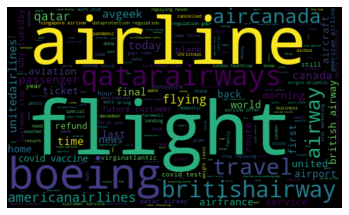

In [ ]:
allWords = ''.join([str(twts) for twts in airline['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Removing columns because we need only the last process from cleaning the data

In [ ]:
airline = airline.drop(['Tweet_lemmatized', 'Tweet_stemmed'], axis=1)

In [ ]:
airline.sample(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text
553,1333805173030916103,2020-12-01 16:08:28,"[worst, airline, world, doesnt, return, money, canceled, flight, britishairways]",0,False,NaN,en,#britishairways,worst airline world doesnt return money canceled flight britishairways
240,1334619073271906304,2020-12-03 22:02:37,"[amazing, half, full, flight, check, size, carryon, gate, americanairlines]",1,False,"Texas, USA",en,#Americanairlines,amazing half full flight check size carryon gate americanairlines
331,1335743146144174081,2020-12-07 00:29:17,"[wirecard, enron, germany, wirecard, finance, enron, fraud, financialplanning, germany, australia]",0,False,"Dadaocheng, Taipei",en,#qatarairways,wirecard enron germany wirecard finance enron fraud financialplanning germany australia
272,1334520022790791170,2020-12-03 15:29:02,"[americanairlines, revers, policy, imposed, weight, limit, wheelchair, accessibility, inclusion]",0,False,NaN,en,#Americanairlines,americanairlines revers policy imposed weight limit wheelchair accessibility inclusion
386,1335232192218361858,2020-12-05 14:38:56,"[airway, wheres, refund, expecting, since, august, despite, promise]",1,False,NaN,en,#britishairways,airway wheres refund expecting since august despite promise


#Save the data set

In [ ]:
airline.to_csv('airline.csv')
!cp airline.csv "./gdrive/My Drive/datasets/new_datasets/"